# Tensorboard logs visualization
This notebook views tensorboard logs which contain loss and metric curves w.r.t epochs

In [71]:
from torchsummary import summary

## Visualizing SSIM curves

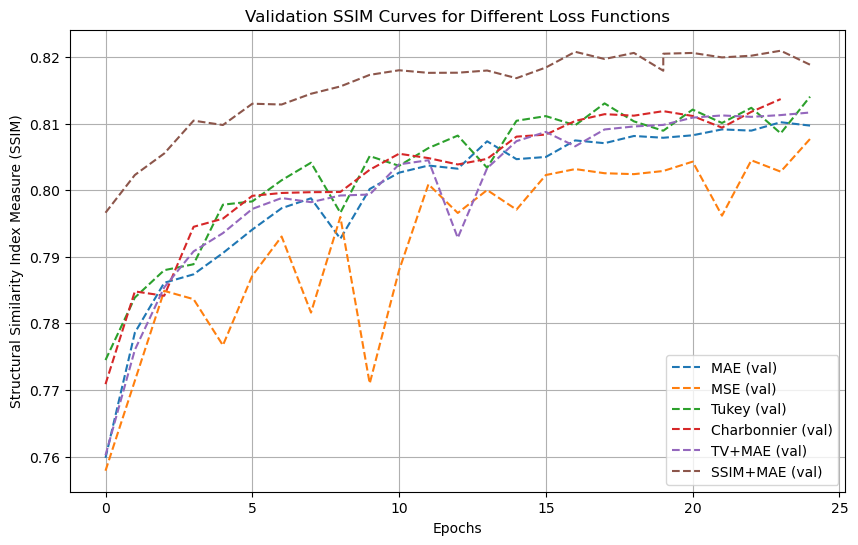

In [54]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tb_data(logdir):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()
    # Extract training and validation losses
    steps = [e.step for e in event_acc.Scalars('SSIM/train')]
    train_loss = [e.value for e in event_acc.Scalars('SSIM/train')]
    val_loss = [e.value for e in event_acc.Scalars('SSIM/val')]
    return steps, train_loss, val_loss

# Directories where TensorBoard logs for different loss functions are stored
logdirs_and_loss_functions = [
    ('tensorboard_runs/mae', 'MAE'),
    ('tensorboard_runs/mse', 'MSE'),
    ('tensorboard_runs/tukey', 'Tukey'),
    ('tensorboard_runs/charbonnier', 'Charbonnier'),
    ('tensorboard_runs/tv_mae', 'TV+MAE'),
    ('tensorboard_runs/ssim_mae', 'SSIM+MAE')
]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot the training and validation losses for each loss function
for logdir, loss_function in logdirs_and_loss_functions:
    steps, train_loss, val_loss = load_tb_data(logdir)
    # plt.plot(steps, train_loss, label=f'{loss_function} (train)', linestyle='--')
    plt.plot(steps, val_loss, label=f'{loss_function} (val)', linestyle='--')

# Configure plot
plt.xlabel('Epochs')
plt.ylabel('Structural Similarity Index Measure (SSIM)')
plt.title('Validation SSIM Curves for Different Loss Functions')
plt.legend(loc='best')  # Automatically position the legend in the best location
plt.grid(True)

# Show plot
plt.show()

## Visualizing PSNR curves

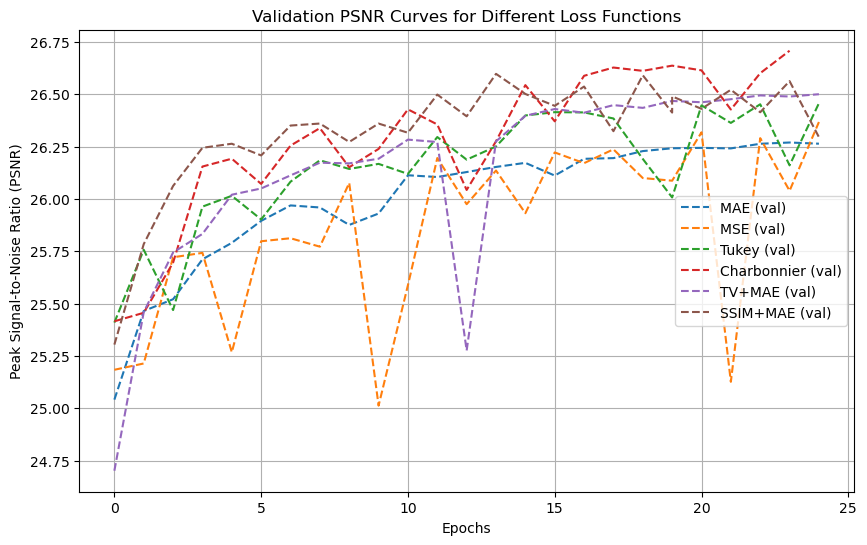

In [73]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tb_data(logdir):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()
    # Extract training and validation losses
    steps = [e.step for e in event_acc.Scalars('PSNR/train')]
    train_loss = [e.value for e in event_acc.Scalars('PSNR/train')]
    val_loss = [e.value for e in event_acc.Scalars('PSNR/val')]
    return steps, train_loss, val_loss

# Directories where TensorBoard logs for different loss functions are stored
logdirs_and_loss_functions = [
    ('tensorboard_runs/mae', 'MAE'),
    ('tensorboard_runs/mse', 'MSE'),
    ('tensorboard_runs/tukey', 'Tukey'),
    ('tensorboard_runs/charbonnier', 'Charbonnier'),
    ('tensorboard_runs/tv_mae', 'TV+MAE'),
    ('tensorboard_runs/ssim_mae', 'SSIM+MAE')
]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot the training and validation losses for each loss function
for logdir, loss_function in logdirs_and_loss_functions:
    steps, train_loss, val_loss = load_tb_data(logdir)
    # plt.plot(steps, train_loss, label=f'{loss_function} (train)', linestyle='--')
    plt.plot(steps, val_loss, label=f'{loss_function} (val)', linestyle='--')

# Configure plot
plt.xlabel('Epochs')
plt.ylabel('Peak Signal-to-Noise Ratio (PSNR)')
plt.title('Validation PSNR Curves for Different Loss Functions')
plt.legend(loc='best')  # Automatically position the legend in the best location
plt.grid(True)

# Show plot
plt.show()

## Visualizing loss curves

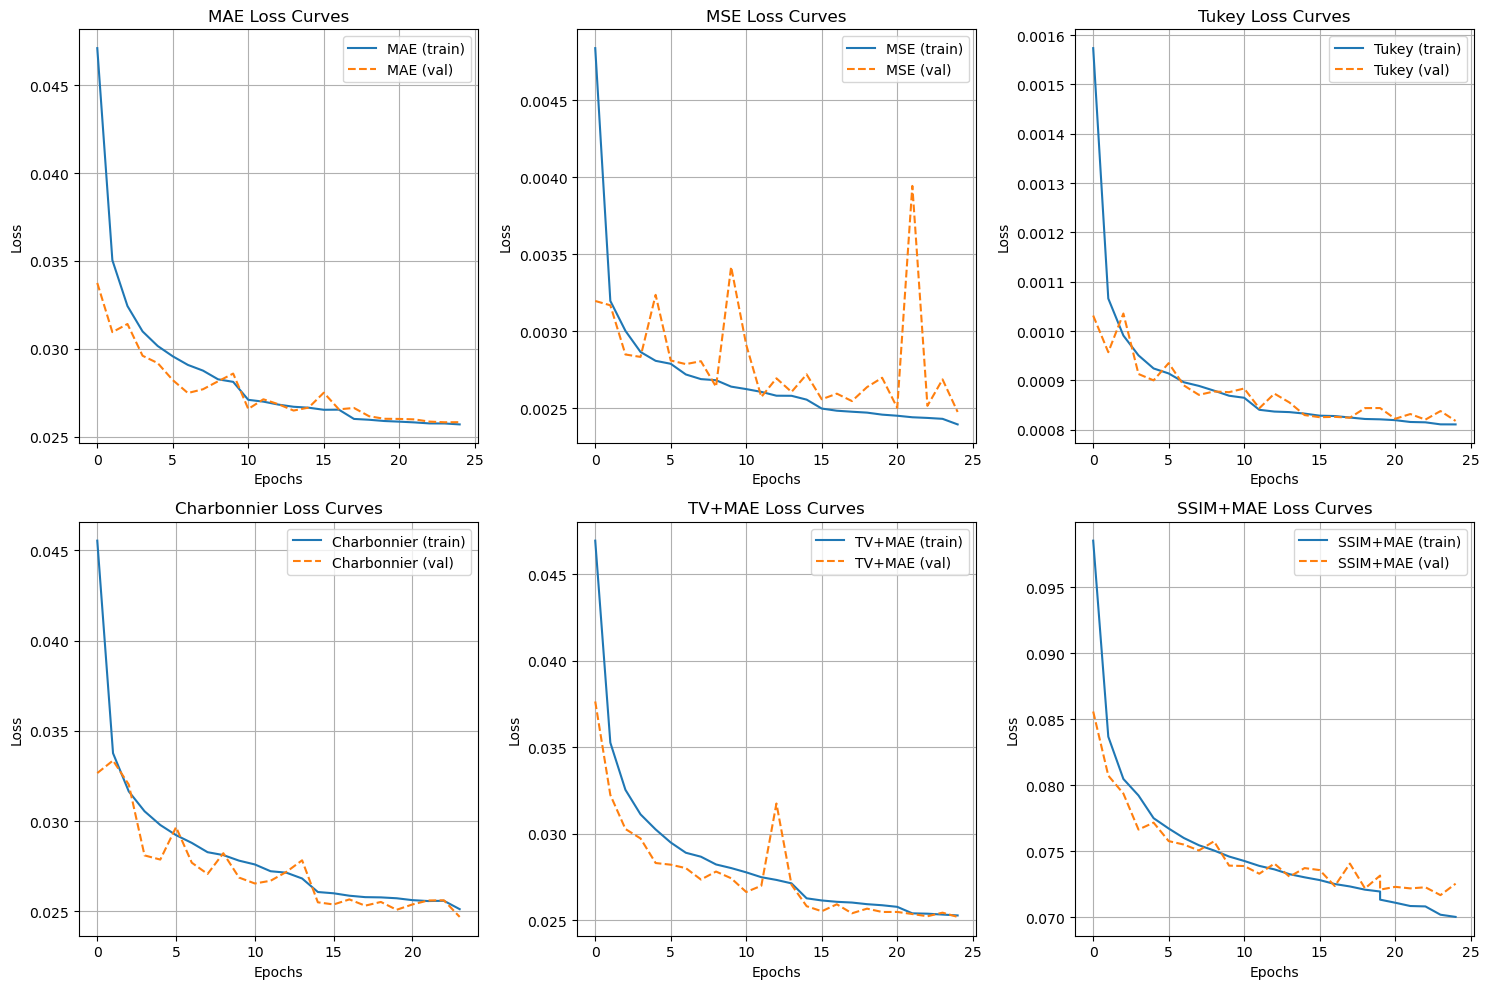

In [70]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tb_data(logdir):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()
    # Extract training and validation losses
    steps = [e.step for e in event_acc.Scalars('Loss/train')]
    train_loss = [e.value for e in event_acc.Scalars('Loss/train')]
    val_loss = [e.value for e in event_acc.Scalars('Loss/val')]
    return steps, train_loss, val_loss

# Directories where TensorBoard logs for different loss functions are stored
logdirs_and_loss_functions = [
    ('tensorboard_runs/mae', 'MAE'),
    ('tensorboard_runs/mse', 'MSE'),
    ('tensorboard_runs/tukey', 'Tukey'),
    ('tensorboard_runs/charbonnier', 'Charbonnier'),
    ('tensorboard_runs/tv_mae', 'TV+MAE'),
    ('tensorboard_runs/ssim_mae', 'SSIM+MAE')
]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the training and validation losses for each loss function in the 2x3 grid
for idx, (logdir, loss_function) in enumerate(logdirs_and_loss_functions):
    steps, train_loss, val_loss = load_tb_data(logdir)
    
    ax = axes[idx // 3, idx % 3]  # Select the correct subplot
    
    # Plot the losses in the corresponding subplot
    ax.plot(steps, train_loss, label=f'{loss_function} (train)', linestyle='-')
    ax.plot(steps, val_loss, label=f'{loss_function} (val)', linestyle='--')
    
    # Configure subplot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'{loss_function} Loss Curves')
    ax.legend(loc='best')
    ax.grid(True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the full 2x3 grid plot
plt.show()

## 1. MAE model curves

In [9]:
%load_ext tensorboard
%tensorboard --logdir tensorboard_runs/mae --port=6007

## 2. MSE model curves

In [15]:
%reload_ext tensorboard
%tensorboard --logdir tensorboard_runs/mse --port=6008

## 3. Tukey model curves

In [21]:
%reload_ext tensorboard
%tensorboard --logdir tensorboard_runs/tukey --port=6020

## 4. Charbonnier model curves

In [31]:
%reload_ext tensorboard
%tensorboard --logdir tensorboard_runs/charbonnier --port=6030

## 5. TV + MAE model curves

In [18]:
%reload_ext tensorboard
%tensorboard --logdir tensorboard_runs/tv_mae --port=6011

## 6. SSIM + MAE model curves

In [25]:
%reload_ext tensorboard
%tensorboard --logdir tensorboard_runs/ssim_mae --port=6024